In [52]:
import cv2
import matplotlib.pyplot as plt
from random import sample
import numpy as np

In [53]:
np.random.seed(1)

**Read the image file**

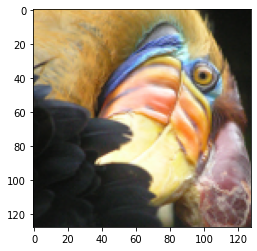

In [54]:
img = cv2.imread('/content/drive/MyDrive/input.png')
  
# convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, channels = np.shape(img)
X = img.reshape(height * width, 3)

org_img = plt.imshow(img_rgb)
plt.show()

In [55]:
K = 3
iteration = 10

cluster = []
distance = []
for i in range(K):
    distance.append(0)
    cluster.append([])


centroid = sample(list(X), K)

In [56]:
for iter in range(iteration):
    
    for i in range(width):
        for j in range(height):
            pixel = img[j][i] 
            
            for k in range(K):
                distance[k] = np.linalg.norm(centroid[k] - pixel)
            
            distance_min = np.min(distance)
            distance_min_index = distance.index(distance_min)
            cluster[distance_min_index].append(pixel)
            
    # set centroid value as mean of cluster
    for i in range(K):
        centroid[i] = np.mean(np.array(cluster[i]), axis=0)

**Change colors**

In [57]:
for i in range(width):
    for j in range(height):
            pixel = img[j][i]

            for k in range(K):
                distance[k] = np.linalg.norm(centroid[k] - pixel)
            
            # assign centroid  value to each pixel
            dist_min = np.min(distance)
            dist_min_index = distance.index(dist_min)
            img[j][i] = centroid[dist_min_index]

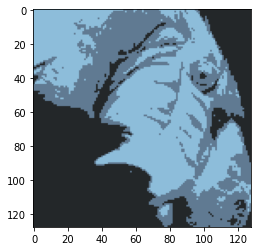

In [58]:
compressed_image = plt.imshow(img)
plt.show()


In [59]:
cv2.imwrite('compressed_final.png', img)

True